In [1]:

 !pip install graphviz
from graphviz import Digraph
from IPython.display import display, SVG
from GradNet.engine import Value
from GradNet.nn import MLP, Neuron, Layer




In [2]:
def trace(root):
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.inputs:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir})

    # Add nodes
    for n in nodes:
        dot.node(name=str(id(n)), label="{data %s | gradient=%.4f}" % (n.num, n.gradient), shape='record')
        if n.operation:  # If the node is a result of an operation
            dot.node(name=str(id(n)) + n.operation, label=n.operation)
            dot.edge(str(id(n)) + n.operation, str(id(n)))

    # Add edges
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.operation)
    
    return dot

In [3]:
# Forward Pass

inputs = [Value(0.5), Value(-0.3), Value(0.8)]

mlp1 = MLP(3, 3, 1)
mlp2 = MLP(3, 4, 1)
mlp3 = MLP(4, 1, 1)




inputs = mlp1.forward(inputs)
print("MLP 1 outputs", inputs, "\n")

inputs = mlp2.forward(inputs)
print("MLP 2 outputs", inputs, "\n")

inputs = mlp3.forward(inputs)
print("MLP 3 outputs", inputs, "\n")


inputs =  [Value(num=0.5), Value(num=-0.3), Value(num=0.8)]
weights =  [0.004843085868525998, 0.5868430967530605, -0.5454695219030852]
bias =  -0.7148568588005517
weighted_sum =  Value(num=-1.324863862414675)


inputs =  [Value(num=0.5), Value(num=-0.3), Value(num=0.8)]
weights =  [0.2295356468831431, -0.24982776693540587, 0.17180384312860686]
bias =  -0.252106218502538
weighted_sum =  Value(num=0.07505300952254079)


inputs =  [Value(num=0.5), Value(num=-0.3), Value(num=0.8)]
weights =  [-0.599062765774393, -0.004574589031459686, -0.24125716463593383]
bias =  -0.28427423803983043
weighted_sum =  Value(num=-0.775438975926336)


MLP 1 outputs [Value(num=-1.324863862414675), Value(num=0.07505300952254079), Value(num=-0.775438975926336)] 

inputs =  [Value(num=-1.324863862414675), Value(num=0.07505300952254079), Value(num=-0.775438975926336)]
weights =  [0.6649142932266849, 0.5706616035182903, -0.5014946236599584]
bias =  0.22282534010592747
weighted_sum =  Value(num=-0.22638723042665404)

In [4]:
# Reset gradients for all output neurons (once before the backward pass)
for neuron in inputs: 
    neuron.reset_grad()

In [5]:
# Backward Pass

for neuron in inputs:
    neuron.gradient = 1.0
    neuron.backward()


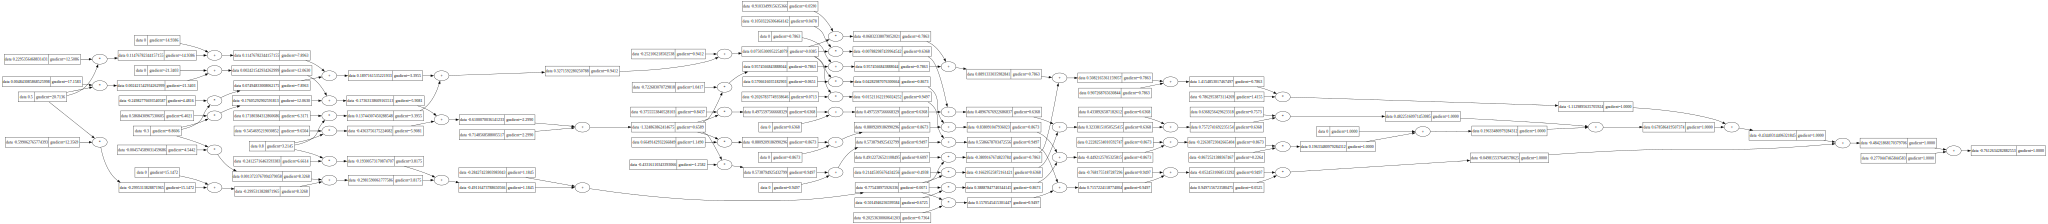

'graph_output.svg'

In [6]:
# Draw computational graph

dot = draw_dot(inputs[0])
display(SVG(dot.pipe(format='svg')))
dot.render(filename='graph_output', format='svg', cleanup=False)

In [1]:
conda install pytorch torchvision torchaudio cpuonly -c pytorch


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\96898\anaconda3

  added / updated specs:
    - cpuonly
    - pytorch
    - torchaudio

Note: you may need to restart the kernel to use updated packages.    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------





==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c defaults conda




    cpuonly-2.0                |                0           2 KB  pytorch
    libjpeg-turbo-2.0.0        |       h196d8e1_0         618 KB
    libuv-1.44.2               |       h2bbff1b_0         288 KB
    pytorch-2.3.0              |      py3.9_cpu_0       138.3 MB  pytorch
    pytorch-mutex-1.0          |              cpu           3 KB  pytorch
    torchaudio-2.3.0           |         py39_cpu         5.7 MB  pytorch
    torchvision-0.18.0         |         py39_cpu         6.5 MB  pytorch
    ------------------------------------------------------------
                                           Total:       151.4 MB

The following NEW packages will be INSTALLED:

  cpuonly            pytorch/noarch::cpuonly-2.0-0
  libjpeg-turbo      pkgs/main/win-64::libjpeg-turbo-2.0.0-h196d8e1_0
  libuv              pkgs/main/win-64::libuv-1.44.2-h2bbff1b_0
  pytorch            pytorch/win-64::pytorch-2.3.0-py3.9_cpu_0
  pytorch-mutex      pytorch/noarch::pytorch-mutex-1.0-cpu
  torchaudio    

In [4]:


import torch
import torch.nn as nn
import torch.optim as optim



In [5]:


# Define the MLP architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(3, 3, bias=True)  # First layer: 3 inputs, 3 neurons
        self.fc2 = nn.Linear(3, 4, bias=True)  # Second layer: 3 neurons, 4 neurons
        self.fc3 = nn.Linear(4, 1, bias=True)  # Third layer: 4 neurons, 1 output

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# Initialize the model
model = MLP()

# Manually initialize weights and biases (to match your Micrograd model)
with torch.no_grad():
    model.fc1.weight = nn.Parameter(torch.tensor([[-0.5067836203890863, 0.9971624445641505, 0.19813295758782123], [-0.431596296167682, -0.9978862431031283, 0.2822632420105071],[-0.39650133377614294, 0.05390022833935593, 0.6086645809824014]]))
    model.fc1.bias = nn.Parameter(torch.tensor([-0.6643496423093809, -0.9827518019662747, 0.8781478089972898]))
    
    model.fc2.weight = nn.Parameter(torch.tensor([[0.8037400061627866, 0.8058065663740552, 0.610700255710277], [0.8721134779731956, -0.3608370923040016, 0.019692347587514147],[-0.5675227646099543, 0.490486973670083, 0.08607476571842643], [0.7149046631575073, -0.8152564494494428, -0.4733277342665323]]))
    model.fc2.bias = nn.Parameter(torch.tensor([-0.7438220413875365, 0.06463926704033907, -0.37539976328634816, 0.4724282401833906]))
    
    model.fc3.weight = nn.Parameter(torch.tensor([ [-0.3220037553699693, 0.34401734704639786, -0.39019396432140807, 0.09085473748815698]]))
    model.fc3.bias = nn.Parameter(torch.tensor([-0.6562667226077885]))

# Input data
inputs = torch.tensor([0.5, -0.3, 0.8], requires_grad=True)  # Requires gradient for backward pass

# Forward pass
outputs = model(inputs)

# Perform backward pass from output (assuming some scalar loss function)
loss = outputs.sum()  # Example loss function
loss.backward()

# Print gradients for each layer
print("Gradients for the input:")
print(inputs.grad)

print("Gradients for layer 1 weights:")
print(model.fc1.weight.grad)
print("Gradients for layer 1 biases:")
print(model.fc1.bias.grad)

print("Gradients for layer 2 weights:")
print(model.fc2.weight.grad)
print("Gradients for layer 2 biases:")
print(model.fc2.bias.grad)

print("Gradients for layer 3 weights:")
print(model.fc3.weight.grad)
print("Gradients for layer 3 biases:")
print(model.fc3.bias.grad)


Gradients for the input:
tensor([ 0.2198,  0.9600, -0.2805])
Gradients for layer 1 weights:
tensor([[ 0.1638, -0.0983,  0.2621],
        [-0.3245,  0.1947, -0.5192],
        [-0.1332,  0.0799, -0.2132]])
Gradients for layer 1 biases:
tensor([ 0.3276, -0.6491, -0.2665])
Gradients for layer 2 weights:
tensor([[ 0.3408,  0.2168, -0.3705],
        [-0.3641, -0.2317,  0.3958],
        [ 0.4130,  0.2627, -0.4490],
        [-0.0962, -0.0612,  0.1045]])
Gradients for layer 2 biases:
tensor([-0.3220,  0.3440, -0.3902,  0.0909])
Gradients for layer 3 weights:
tensor([[-1.4344, -0.5928, -0.0060, -0.2799]])
Gradients for layer 3 biases:
tensor([1.])
